In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import os

path = 'power-consumption'
processed_path = os.path.join(path, '.processed')
processed_file = os.path.join(processed_path, 'household-pow.csv')

# Exploratory Analysis - Household Power Consumption Dataset
The dataset is a multivariate time series that describes the electricity consumption for a single household collected over four years between December 2006 and November 2010 taking observations of power consumption every minute.

In [3]:
df = pd.read_csv(processed_file, header=0, infer_datetime_format=True, parse_dates=['Date_time'], index_col=['Date_time'])

Dataset description, where:
- global_active_power -> Household global minute-averaged active power (in kilowatts)
- global_reactive_power -> Household global minute-averaged reactive power (in kilowatts)
- voltage -> Minute-averaged voltage (in volts)
- global_intensity -> Household global minute-averaged current intensity (in amperes)
- sub_metering_1 -> Corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
- sub_metering_2 -> Corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
- sub_metering_3 -> Corresponds to an electric water-heater and an air-conditioner.
- sub_metering_4 -> Corresponds to electrical equipment not measured in sub-meterings 1, 2 and 3.

In [4]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06
mean,1.09162,0.123714,240.84,4.62776,1.12192,1.29852,6.45845,9.31469
std,1.05729,0.112722,3.23999,4.4444,6.15303,5.82203,8.43715,9.58592
min,0.076,0,223.2,0.2,0,0,0,-2.4
25%,0.308,0.048,238.99,1.4,0,0,0,3.8
50%,0.602,0.1,241.01,2.6,0,0,1,5.5
75%,1.528,0.194,242.89,6.4,0,1,17,10.3667
max,11.122,1.39,254.15,48.4,88,80,31,124.833


In [5]:
print(f'Rows with all missing values: {len(df[df.isnull().all(1) == True])}')

Rows with all missing values: 25979


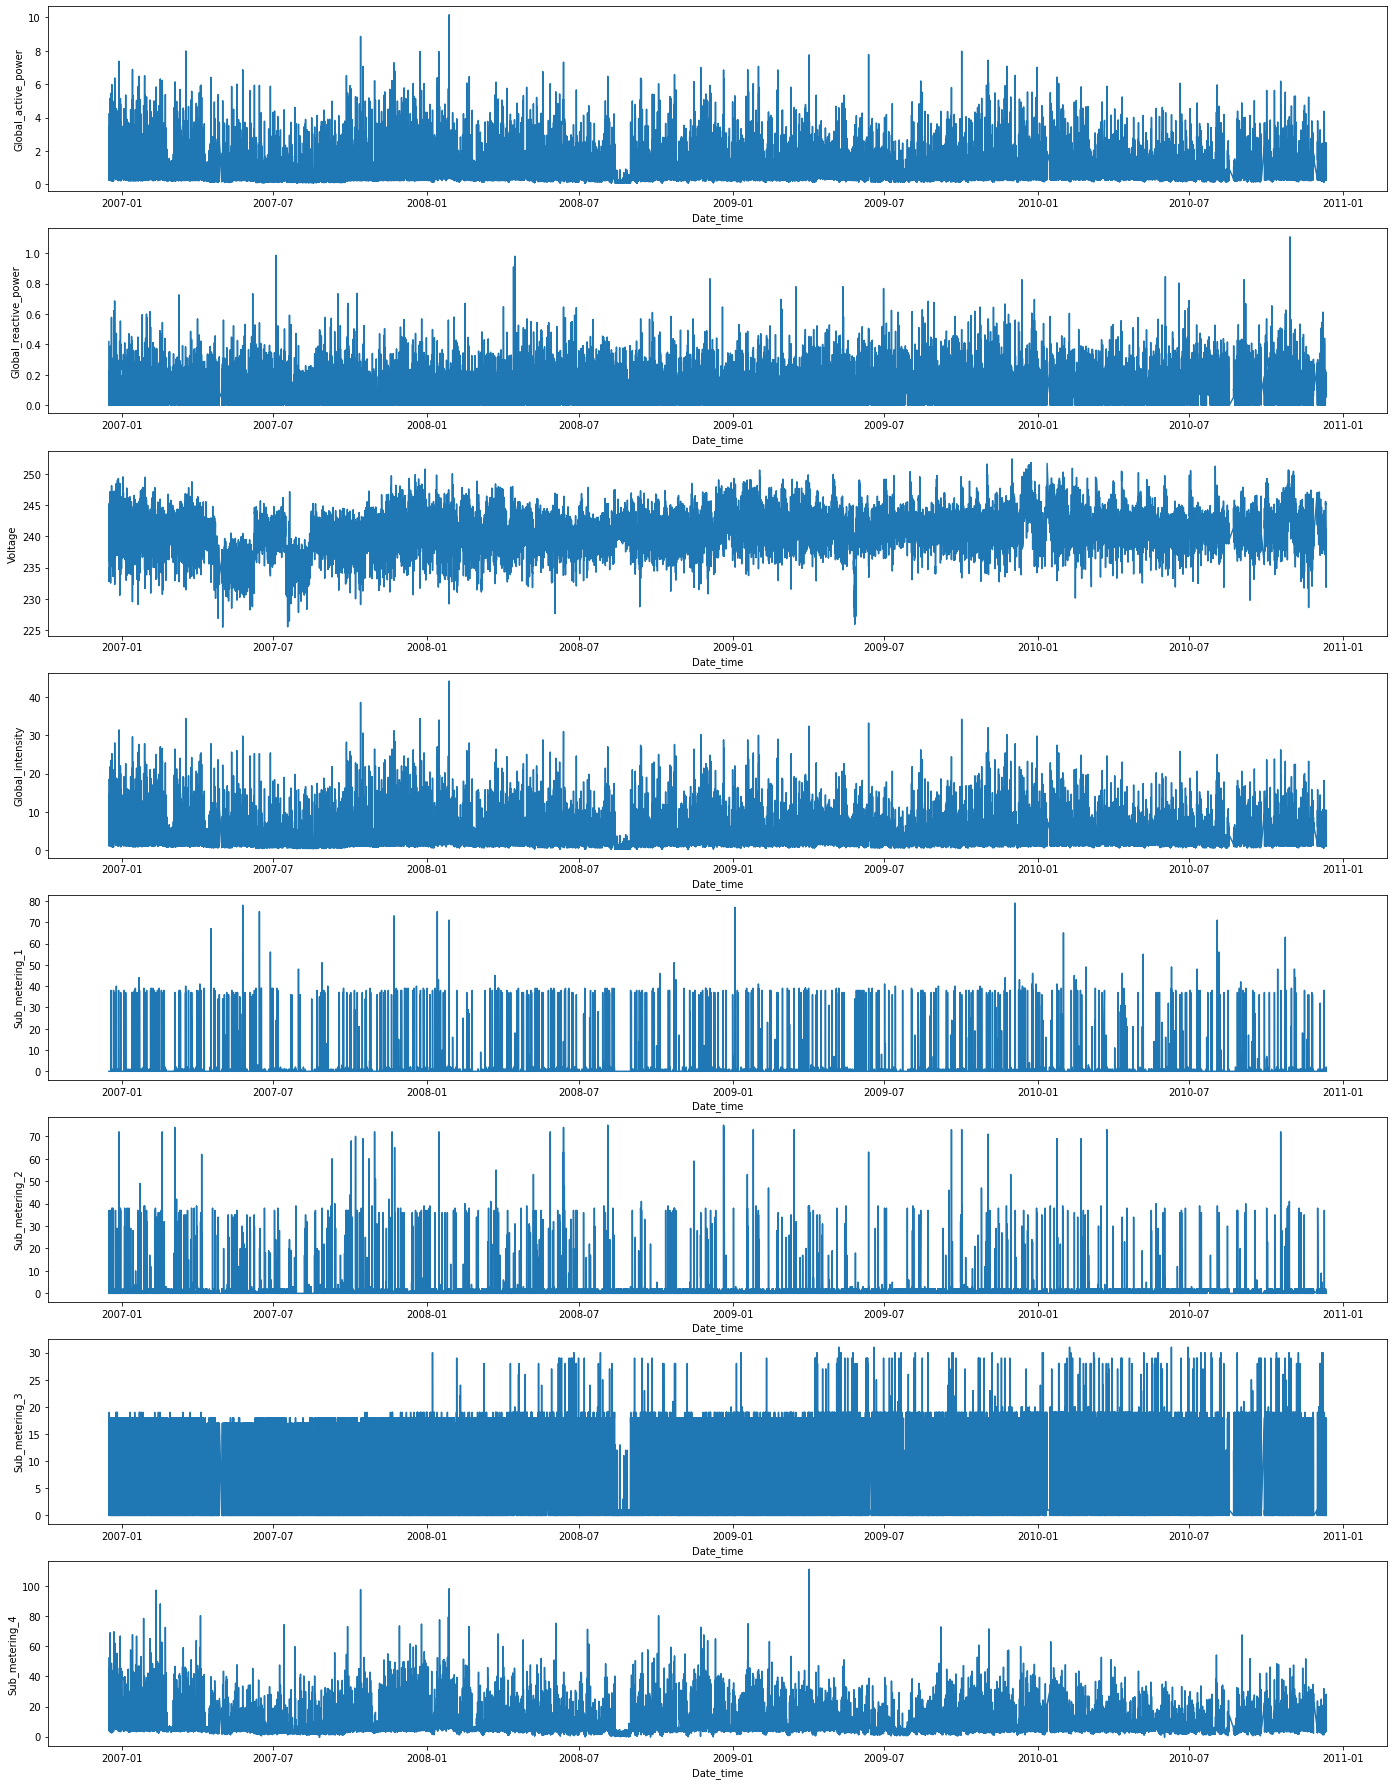

In [12]:
plt.figure(figsize=(24, 32))
for i in range(len(df.columns)):
	plt.subplot(len(df.columns), 1, i + 1)
	name = df.columns[i]
	sns.lineplot(x = 'Date_time', y = name, data = df[::10])

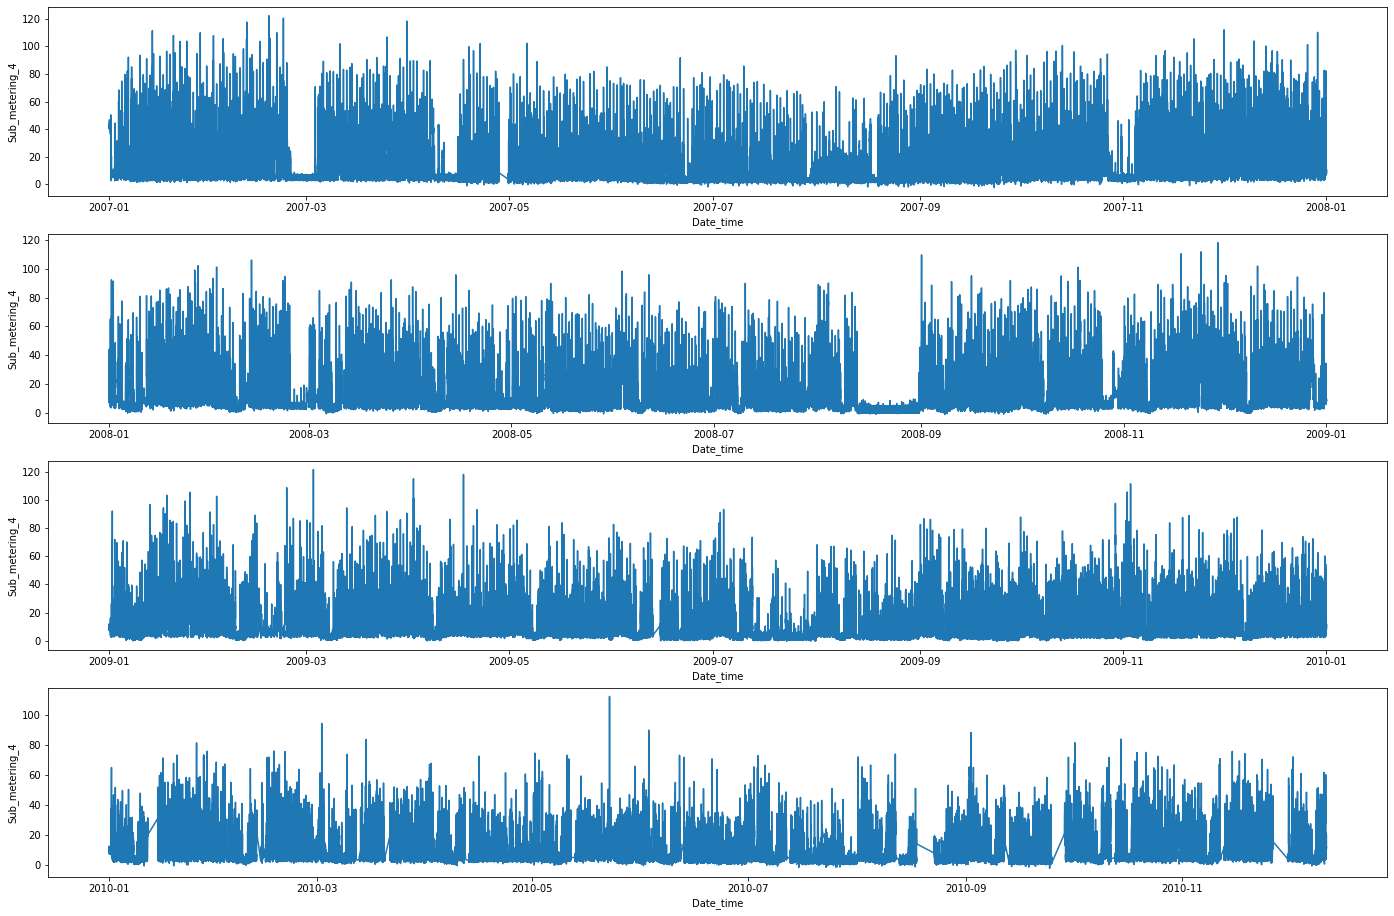

In [19]:
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(24, 16))
for i in range(len(years)):
	plt.subplot(len(years), 1, i+1)
	year = years[i]
	result = df.loc[year]
	sns.lineplot(x = 'Date_time', y = name, data = result[::])